## Model Test(Logistic regression, random forest, LightGBM)

In [52]:
# import the relevant computational modules

# data manipulation
import pandas as pd #data processing
import numpy as np #linear algebra

# Models Packages
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn import feature_selection
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Gradient Boosting
import lightgbm as lgb

# Basic Model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Oversampling
from imblearn.over_sampling import SMOTE

# split dataset
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import KFold

# grid search
from sklearn.model_selection import GridSearchCV


# visualization 
import matplotlib.pyplot as plt
%matplotlib inline

In [221]:
# import data

transaction_training = pd.read_csv('../raw_data/transactions_train.csv')
payment_training = pd.read_csv('../raw_data/paiements_train.csv')
billing_training = pd.read_csv('../raw_data/facturation_train.csv')
performance_training = pd.read_csv('../raw_data/performance_train.csv')


transaction_test = pd.read_csv('../raw_data/transactions_test.csv')
payment_test = pd.read_csv('../raw_data/paiements_test.csv')
billing_test = pd.read_csv('../raw_data/facturation_test.csv')
performance_test = pd.read_csv('../raw_data/performance_test.csv')

In [49]:
payment_training.head()

,ID_CPTE,TRANSACTION_AMT,TRANSACTION_DTTM,PAYMENT_REVERSAL_XFLG
0,99690111,208.0,2015-04-26 00:00:00,Q
1,99690111,176.8,2015-05-28 00:00:00,Q
2,99690111,200.0,2015-03-27 04:00:00,Q
3,99690111,80.8,2015-04-02 00:00:00,Q
4,99690111,250.0,2015-11-24 00:00:00,Q


In [50]:
billing_training.head()

,ID_CPTE,PERIODID_MY,StatementDate,CurrentTotalBalance,CashBalance,CreditLimit,DelqCycle
0,99690111,2015-05,2015-05-03,8497.84,4293.12,16200.0,0
1,99690111,2014-11,2014-11-03,866.00,0.00,12000.0,0
2,99690111,2015-06,2015-05-31,10790.95,5224.44,16200.0,0
3,99690111,2015-10,2015-10-04,12388.46,4786.08,16200.0,0
4,99690111,2015-11,2015-11-02,12746.50,4818.48,16200.0,0


In [51]:
performance_training.head()

,ID_CPTE,PERIODID_MY,Default
0,99690111,2015-12-01,0
1,57427180,2012-12-01,0
2,29617912,2015-12-01,0
3,61632809,2015-12-01,0
4,14117855,2013-12-01,0


C:\Users\futai\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([5.12925010e-04, 2.09659012e-05, 4.88468195e-06, 1.63132045e-06,
        7.18226411e-07, 4.80673489e-07, 2.07858806e-07, 1.39191165e-07,
        1.28055872e-07, 8.53705811e-08, 5.56764659e-08, 3.52617618e-08,
        3.15499974e-08, 1.11352932e-08, 7.42352879e-09, 2.41264686e-08,
        7.42352879e-09, 7.42352879e-09, 5.56764659e-09, 1.85588220e-09,
        3.71176440e-09, 3.71176440e-09, 1.85588220e-09, 1.85588220e-09,
        1.85588220e-09, 0.00000000e+00, 0.00000000e+00, 3.71176440e-09,
        0.00000000e+00, 1.85588220e-09]),
 array([    0.   ,  1843.752,  3687.504,  5531.256,  7375.008,  9218.76 ,
        11062.512, 12906.264, 14750.016, 16593.768, 18437.52 , 20281.272,
        22125.024, 23968.776, 25812.528, 27656.28 , 29500.032, 31343.784,
        33187.536, 35031.288, 36875.04 , 38718.792, 40562.544, 42406.296,
        44250.048, 46093.8  , 47937.552, 49781.304, 51625.056, 53468.808,
        55312.56 ]),
 <a list of 30 Patch objects>)

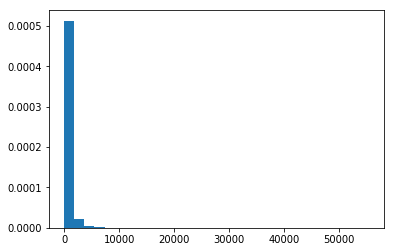

In [63]:
# Abnormal value detaction
plt.hist(np.array(payment_training['TRANSACTION_AMT'].dropna()), normed=True, bins=30)

In [73]:
performance_training[performance_training['ID_CPTE'] == 32951452]

,ID_CPTE,PERIODID_MY,Default
11840,32951452,2014-12-01,0


In [67]:
billing_training[billing_training['ID_CPTE'] == 23238663]

,ID_CPTE,PERIODID_MY,StatementDate,CurrentTotalBalance,CashBalance,CreditLimit,DelqCycle
21517,23238663,2013-12,2013-12-12,863.10,0.0,8000.0,0
21518,23238663,2013-11,2013-11-15,358.44,0.0,8000.0,0
21519,23238663,2013-10,2013-10-15,3031.35,81.0,8000.0,0
21520,23238663,2013-09,2013-09-13,2249.14,0.0,8000.0,0
21521,23238663,2013-08,2013-08-12,1254.60,0.0,8000.0,0
21522,23238663,2013-07,2013-07-15,461.00,0.0,8000.0,0
21523,23238663,2013-06,2013-06-11,0.00,0.0,8000.0,0
21524,23238663,2013-05,2013-05-13,3156.00,0.0,8000.0,0
21525,23238663,2013-04,2013-04-12,3045.72,0.0,8000.0,0
21526,23238663,2013-03,2013-03-12,2634.34,0.0,8000.0,0


In [6]:
# Create basic scikit-learn wrapper model class
class SklearnWrapper:
    def __init__(self, clf, seed=0, params=None, seed_bool=True):
        if (seed_bool == True):
            params['random_state'] = seed
        self.clf = clf(**params)
    
    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)
        
    def predict(self, x):
        return self.clf.predict(x)

In [7]:
# create basic xgboost wrapper model class
class XgbWrapper:
    def __init__(self, seed=0, params=None):
        self.param = params
        self.param['seed'] = seed
        self.nrounds = params.pop('nrounds', 250)

    def train(self, x_train, y_train):
        dtrain = xgb.DMatrix(x_train, label=y_train)
        self.gbdt = xgb.train(self.param, dtrain, self.nrounds)

    def predict(self, x):
        return self.gbdt.predict(xgb.DMatrix(x))

In [8]:
# create basic lightGBM wrapper model class
class LightGbmWrapper:
    def __init(self, seed=0, params=None):
        self.param = params
        self.param['seed'] = seed
        self.nrounds = params.pop('nrounds', 1550)
        self.verbose_eval = params.pop('verbose_eval', 100)
        
    def train(self, x_train, y_train):
        lgtrain = lgb.Dataset(x_train, y_train)
        self.lgbm = lgb.train(self.param, lgtrain, num_boost_round=self.nrounds, verbose_eval=self.verbose_eval)
    
    def predict(self, x):
        return self.lgbm.predict(lgb.Dataset(x))

In [9]:
# create out-of-fold predictions 
# make good use of k-fold CV's result 
# serving for the staking alogrithm 
# create a new column generated from model's score

def get_oof(clf, x_train, y, x_test):
    '''
    clf: the classifer, which can be logistic regression, SVM regression, Bayes classifier, etc.
    x_train: the training x in training dataset
    y: the training y in training dataset
    x_test: the testing x in training dataset 
    '''
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))
    
    for i, (train_index, test_index) in enumerate(kf):
        print('\nFold {}'.format(i))
        x_tr = x_train[train_index]
        y_tr = y[train_index]
        x_te = x_train[test_index]
        
        clf.fit(x_tr, y_tr)
        
        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)
    
    m = stats.mode(oof_test_skf, axis=1)
    oof_test[:] = m[0][0]
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)       

In [323]:
# data preprocess

class DataPreprocess:
    def __init__(self, label_encoder):
        self.lbl = label_encoder
    
    def convert_date(self, statement_date, period_date):
        statement_day = statement_date.split('-')[-1]
        period_day = period_date.split('-')[-1]
        statement_month = statement_date.split('-')[-2]
        period_month = period_date.split('-')[-2]
        if int(statement_month) < int(period_month):
            tmp = 0
        else:
            if int(statement_day) > 20:
                tmp = 1
            else:
                tmp = 0
        return tmp
    
    
    def initialize_billing(self, billing_df):
        tmp = []
        for index, row in billing_df.iterrows():
            tmp.append(self.convert_date(row['StatementDate'], row['PERIODID_MY']))

        billing_df['statement_time'] = tmp
        
        return billing_df
    
    def preprocess_transcation(self, transaction_df):
        categorical_columns = ['MERCHANT_CATEGORY_XCD', 'MERCHANT_CITY_NAME', 'MERCHANT_COUNTRY_XCD', 
                               'DECISION_XCD', 'TRANSACTION_CATEGORY_XCD', 'TRANSACTION_TYPE_XCD', 'SICGROUP']
        
        for col in categorical_columns:
            transaction_df[col].fillna('unknown')
            transaction_df[col] = self.lbl.fit_transform(transaction_df[col].astype(str))
        
        transaction_df = transaction_df.groupby(['ID_CPTE', 'MERCHANT_CATEGORY_XCD'])['TRANSACTION_AMT'].sum()
        transaction_df = transaction_df.reset_index()
        transaction_df = transaction_df.pivot_table('TRANSACTION_AMT', ['ID_CPTE'], 'MERCHANT_CATEGORY_XCD')
        transaction_df.columns = ['MERCHANT_CATEGORY_' + str(i) for i in transaction_df.columns]
        transaction_df = transaction_df.fillna(0)
        
        return transaction_df
    
    def preprocess_payment(self, payment_df):
        payment_df = payment_df.dropna()
        payment_df['TRANSACTION_DTTM'] = payment_df['TRANSACTION_DTTM'].apply(lambda x: str(x).split(' ')[0][:-3])
        payment_df = payment_df.sort_values(['ID_CPTE', 'TRANSACTION_DTTM'])
        payment_df['PAYMENT_N_COUNT'] = payment_df['PAYMENT_REVERSAL_XFLG'] == 'N'
        
        payment_df = payment_df.groupby(['ID_CPTE', 'TRANSACTION_DTTM'])[['TRANSACTION_AMT', 'PAYMENT_N_COUNT']].sum().reset_index()
        payment_df = payment_df.groupby('ID_CPTE').tail(12)
        
        tmp = payment_df.groupby(['ID_CPTE'])['PAYMENT_N_COUNT'].sum().reset_index()
        
        payment_df['TRANSACTION_DTTM'] = payment_df['TRANSACTION_DTTM'].apply(lambda x: x.split('-')[1])
        payment_df = payment_df.pivot_table('TRANSACTION_AMT', ['ID_CPTE'], 'TRANSACTION_DTTM')
        payment_df.columns = ['transaction_' + str(i) for i in payment_df.columns + '_month']
        payment_df = payment_df.reset_index()
        payment_df = payment_df.fillna(0)
        
        payment_df = payment_df.merge(tmp, on='ID_CPTE')
        
        return payment_df
    
    def preprocess_billing(self, billing_df):
        billing_df['PERIODID_MY'] = billing_df['PERIODID_MY'].apply(lambda x: x[:-3])
        billing_df = billing_df.sort_values(['ID_CPTE', 'PERIODID_MY'])
        billing_df = billing_df.reset_index(drop=True)
        billing_df = billing_df.groupby('ID_CPTE').tail(12)
        billing_df = billing_df.reset_index(drop=True)
        billing_df['CreditLeft'] = billing_df['CreditLimit'] - billing_df['CurrentTotalBalance']
        
        billing_df['PERIODID_MY'] = billing_df['PERIODID_MY'].apply(lambda x: x[-2:])
        credit_left = billing_df.pivot_table('CreditLeft', ['ID_CPTE'], 'PERIODID_MY')
        credit_left.columns = ['credit_left_' + str(i) for i in credit_left.columns + '_month']
        cash_balance = billing_df.pivot_table('CashBalance', ['ID_CPTE'], 'PERIODID_MY')
        cash_balance.columns = ['cash_balance_' + str(i) for i in cash_balance.columns + '_month']
        
        delq_cycle_avg = billing_df.groupby(['ID_CPTE'])['DelqCycle'].mean().reset_index()
        delq_cycle_avg = delq_cycle_avg.rename(columns={'DelqCycle': 'AvgDelqCycle'})
        
        delq_cycle = billing_df.groupby(['ID_CPTE'])['DelqCycle'].max().reset_index()
        delq_cycle = delq_cycle.rename(columns={'DelqCycle': 'MaxDelqCycle'})
        
        late_count = billing_df.groupby(['ID_CPTE'])['statement_time'].sum().reset_index()
        late_count = late_count.rename(columns={'statement_time': 'LateCount'})
        
        credit_left = credit_left.reset_index()
        cash_balance = cash_balance.reset_index()
        
        tmp = credit_left.merge(cash_balance, on='ID_CPTE')
        tmp = tmp.merge(delq_cycle, on='ID_CPTE')
        tmp = tmp.merge(delq_cycle_avg, on='ID_CPTE')
        tmp = tmp.merge(late_count, on='ID_CPTE')
        
        return tmp
    
    def merge(self, payment, billing):
        merge_df = payment.merge(billing, on='ID_CPTE', how='right')
        return merge_df.set_index(['ID_CPTE']) 

In [168]:
billing_test.head()

,ID_CPTE,PERIODID_MY,StatementDate,CurrentTotalBalance,CashBalance,CreditLimit,DelqCycle
0,71424379,2013-11-01,2013-11-04,1444.30,0.0,3200.0,0
1,71424379,2014-05-01,2014-04-30,785.89,0.0,3200.0,0
2,71424379,2014-08-01,2014-08-02,1095.48,0.0,3200.0,0
3,71424379,2014-04-01,2014-04-02,845.30,0.0,3200.0,0
4,71424379,2013-12-01,2013-11-30,1623.28,0.0,3200.0,0


In [169]:
label_encoder = preprocessing.LabelEncoder()

In [222]:
preprocess = DataPreprocess(label_encoder)

In [223]:
billing_training = preprocess.initialize_billing(billing_training)

In [224]:
processed_payment = preprocess.preprocess_payment(payment_training)

C:\Users\futai\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [225]:
processed_billing = preprocess.preprocess_billing(billing_training)

In [226]:
processed_data = preprocess.merge(processed_payment, processed_billing)

In [227]:
transaction_col = processed_data.iloc[:, :12].columns

In [228]:
# deal with missing value in payment
for col in transaction_col:
    replace_value = processed_data[processed_data[col].notna()][col].mean()
    processed_data[col] = processed_data[col].fillna(replace_value)

In [229]:
processed_data = processed_data.fillna(0)

In [230]:
processed_data = processed_data.reset_index()

In [231]:
processed_data = processed_data.merge(performance_training[['ID_CPTE', 'Default']], on='ID_CPTE')

In [232]:
processed_data = processed_data.set_index('ID_CPTE')

In [233]:
processed_data.head()

,transaction_01_month,transaction_02_month,transaction_03_month,transaction_04_month,transaction_05_month,transaction_06_month,transaction_07_month,transaction_08_month,transaction_09_month,transaction_10_month,...,cash_balance_07_month,cash_balance_08_month,cash_balance_09_month,cash_balance_10_month,cash_balance_11_month,cash_balance_12_month,MaxDelqCycle,AvgDelqCycle,LateCount,Default
ID_CPTE,,,,,,,,,,,,,,,,,,,,,
10001822,318.00,522.50,374.50,4200.00,262.5,265.00,267.50,300.0,250.0,231.75,...,0.00,0.00,0.0,0.00,101.0,0.00,0,0.000000,0,0
10007972,784.34,168.28,1050.00,559.50,664.0,313.50,843.71,191.9,945.9,701.47,...,0.00,3.09,0.0,0.00,0.0,0.00,0,0.000000,1,0
10012520,0.00,86.10,458.00,1177.31,315.0,525.00,505.00,50.5,1115.0,612.00,...,375.72,477.36,639.0,849.66,1224.0,777.65,0,0.000000,0,0
10025534,131.30,0.00,260.00,0.00,6264.0,0.00,2080.00,0.0,318.0,0.00,...,0.00,0.00,0.0,0.00,0.0,0.00,1,0.416667,12,1
10033579,574.55,391.30,412.23,470.53,546.8,419.61,283.92,106.0,84.0,219.60,...,20.60,0.00,0.0,0.00,0.0,0.00,1,0.083333,0,0


In [234]:
billing_training[billing_training['ID_CPTE'] == 35143533].sort_values(['StatementDate'])

,ID_CPTE,PERIODID_MY,StatementDate,CurrentTotalBalance,CashBalance,CreditLimit,DelqCycle,statement_time
1012,35143533,2012-11,2012-11-24,7541.88,1381.12,7000.0,0,1
1016,35143533,2012-12,2012-12-20,53.53,0.00,7000.0,0,0
1011,35143533,2013-01,2013-01-20,0.00,0.00,7000.0,0,0
1014,35143533,2013-02,2013-02-17,0.00,0.00,7000.0,0,0
1015,35143533,2013-03,2013-03-23,745.72,329.60,7000.0,0,1
1008,35143533,2013-04,2013-04-22,2831.47,301.92,7000.0,0,1
1019,35143533,2013-05,2013-05-19,4157.52,250.92,7000.0,0,0
1009,35143533,2013-06,2013-06-23,6199.57,208.08,7000.0,1,1
1017,35143533,2013-07,2013-07-20,7001.94,87.72,7000.0,0,0
1013,35143533,2013-08,2013-08-20,8375.22,505.00,12000.0,0,0


In [235]:
billing_training[billing_training['ID_CPTE'] == 58512689].sort_values(['StatementDate'])

,ID_CPTE,PERIODID_MY,StatementDate,CurrentTotalBalance,CashBalance,CreditLimit,DelqCycle,statement_time
113,58512689,2013-11,2013-11-15,2533.40,0.0,8800.0,0,0
112,58512689,2013-12,2013-12-13,2904.72,0.0,8800.0,0,0
117,58512689,2014-01,2014-01-20,2926.35,0.0,8800.0,0,0
120,58512689,2014-02,2014-02-17,2718.92,0.0,8800.0,0,0
114,58512689,2014-03,2014-03-17,3140.00,0.0,8800.0,0,0
125,58512689,2014-04,2014-04-14,3326.96,0.0,8800.0,0,0
123,58512689,2014-05,2014-05-18,1696.00,0.0,8800.0,0,0
115,58512689,2014-06,2014-06-17,1354.68,0.0,8800.0,0,0
119,58512689,2014-07,2014-07-16,973.64,0.0,8800.0,0,0
121,58512689,2014-08,2014-08-14,788.64,0.0,8800.0,0,0


In [236]:
payment_training[payment_training['ID_CPTE'] == 61632809].sort_values(['TRANSACTION_DTTM'])

,ID_CPTE,TRANSACTION_AMT,TRANSACTION_DTTM,PAYMENT_REVERSAL_XFLG
67,61632809,321.00,2015-01-01 00:00:00,Q
56,61632809,454.50,2015-01-06 00:00:00,Q
43,61632809,299.25,2015-01-23 00:00:00,Q
59,61632809,345.45,2015-02-07 00:00:00,Q
49,61632809,117.60,2015-02-20 00:00:00,Q
57,61632809,8.56,2015-03-01 00:00:00,Q
61,61632809,300.00,2015-03-02 00:00:00,Q
58,61632809,408.00,2015-03-02 00:00:00,Q
52,61632809,50.96,2015-03-04 00:00:00,Q
65,61632809,335.92,2015-03-20 00:00:00,Q


In [237]:
performance_training[performance_training['Default'] == 1].head(10)

,ID_CPTE,PERIODID_MY,Default
18,75780289,2012-12-01,1
53,58022132,2013-12-01,1
56,25809739,2015-12-01,1
72,35143533,2013-12-01,1
137,94504449,2012-12-01,1
208,59776762,2013-12-01,1
232,28710728,2016-12-01,1
302,84279471,2016-12-01,1
320,65860216,2013-12-01,1
338,57628717,2013-12-01,1


In [238]:
performance_training[performance_training['Default'] == 0].head(10)

,ID_CPTE,PERIODID_MY,Default
0,99690111,2015-12-01,0
1,57427180,2012-12-01,0
2,29617912,2015-12-01,0
3,61632809,2015-12-01,0
4,14117855,2013-12-01,0
5,23700394,2013-12-01,0
6,27881705,2012-12-01,0
7,46100731,2012-12-01,0
8,58512689,2014-12-01,0
9,24661392,2016-12-01,0


In [239]:
tmp = processed_data.drop(['MaxDelqCycle'], 1)

In [251]:
X = np.array(processed_data.iloc[:, :-1])
y = np.array(processed_data.iloc[:, -1])

In [306]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [280]:
sm = SMOTE(random_state=42, ratio=1)
X_res, y_res = sm.fit_sample(X_train, y_train)

C:\Users\futai\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [307]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
 
clf = LogisticRegression()
rf = RandomForestClassifier(min_samples_split=200, max_depth=20, random_state=0)

In [308]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [303]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [309]:
predict_clf = clf.predict(X_test)

In [310]:
roc_auc_score(predict_clf, y_test)

0.8112468690369438

In [304]:
predict_rf = rf.predict(X_test)

In [305]:
roc_auc_score(predict_rf, y_test)

0.7920722963618281

In [260]:
importance = rf.feature_importances_
importance = pd.DataFrame(importance, index=processed_data.iloc[:, :-1].columns, columns=["Importance"])
importance.sort_values('Importance', ascending=False)

,Importance
credit_left_11_month,0.193770
credit_left_12_month,0.104274
credit_left_09_month,0.076697
credit_left_07_month,0.058398
AvgDelqCycle,0.049819
credit_left_06_month,0.040469
transaction_11_month,0.039283
MaxDelqCycle,0.034331
credit_left_02_month,0.033322
transaction_12_month,0.029217


In [354]:
# LightGBM

In [261]:
lgbm_params =  {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    #'max_depth': 15,
    'num_leaves': 270,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.75,
    'bagging_freq': 2,
    'learning_rate': 0.0175,
    'verbose': 0
}

In [262]:
lgtrain = lgb.Dataset(X_train, y_train)
lgtest = lgb.Dataset(X_test, y_test)

In [263]:
lgb_clf = lgb.train(
    lgbm_params,
    lgtrain,
    valid_sets=lgtrain,
    num_boost_round=2000,
)

[1]	training's binary_logloss: 0.68148
[2]	training's binary_logloss: 0.670674
[3]	training's binary_logloss: 0.66004
[4]	training's binary_logloss: 0.64976
[5]	training's binary_logloss: 0.639481
[6]	training's binary_logloss: 0.62958
[7]	training's binary_logloss: 0.619872
[8]	training's binary_logloss: 0.610664
[9]	training's binary_logloss: 0.601547
[10]	training's binary_logloss: 0.59294
[11]	training's binary_logloss: 0.584435
[12]	training's binary_logloss: 0.576012
[13]	training's binary_logloss: 0.567812
[14]	training's binary_logloss: 0.560039
[15]	training's binary_logloss: 0.552178
[16]	training's binary_logloss: 0.544605
[17]	training's binary_logloss: 0.537513
[18]	training's binary_logloss: 0.530439
[19]	training's binary_logloss: 0.523517
[20]	training's binary_logloss: 0.516769
[21]	training's binary_logloss: 0.510142
[22]	training's binary_logloss: 0.503677
[23]	training's binary_logloss: 0.497366
[24]	training's binary_logloss: 0.491171
[25]	training's binary_logloss

[205]	training's binary_logloss: 0.137888
[206]	training's binary_logloss: 0.137106
[207]	training's binary_logloss: 0.136362
[208]	training's binary_logloss: 0.135622
[209]	training's binary_logloss: 0.134914
[210]	training's binary_logloss: 0.134156
[211]	training's binary_logloss: 0.133387
[212]	training's binary_logloss: 0.132675
[213]	training's binary_logloss: 0.131935
[214]	training's binary_logloss: 0.131248
[215]	training's binary_logloss: 0.13054
[216]	training's binary_logloss: 0.129859
[217]	training's binary_logloss: 0.129197
[218]	training's binary_logloss: 0.128469
[219]	training's binary_logloss: 0.12776
[220]	training's binary_logloss: 0.127061
[221]	training's binary_logloss: 0.126393
[222]	training's binary_logloss: 0.125669
[223]	training's binary_logloss: 0.124992
[224]	training's binary_logloss: 0.124286
[225]	training's binary_logloss: 0.123594
[226]	training's binary_logloss: 0.122962
[227]	training's binary_logloss: 0.122219
[228]	training's binary_logloss: 0.1

[399]	training's binary_logloss: 0.0495467
[400]	training's binary_logloss: 0.0492952
[401]	training's binary_logloss: 0.0490298
[402]	training's binary_logloss: 0.0487856
[403]	training's binary_logloss: 0.0485682
[404]	training's binary_logloss: 0.0483242
[405]	training's binary_logloss: 0.0480744
[406]	training's binary_logloss: 0.0478325
[407]	training's binary_logloss: 0.0475933
[408]	training's binary_logloss: 0.0473536
[409]	training's binary_logloss: 0.0471286
[410]	training's binary_logloss: 0.0468885
[411]	training's binary_logloss: 0.0466459
[412]	training's binary_logloss: 0.0464238
[413]	training's binary_logloss: 0.0461957
[414]	training's binary_logloss: 0.0459652
[415]	training's binary_logloss: 0.0457214
[416]	training's binary_logloss: 0.0454857
[417]	training's binary_logloss: 0.0452528
[418]	training's binary_logloss: 0.0450197
[419]	training's binary_logloss: 0.0448007
[420]	training's binary_logloss: 0.0445844
[421]	training's binary_logloss: 0.0443695
[422]	train

[594]	training's binary_logloss: 0.0193588
[595]	training's binary_logloss: 0.0192676
[596]	training's binary_logloss: 0.0191892
[597]	training's binary_logloss: 0.0190983
[598]	training's binary_logloss: 0.0190122
[599]	training's binary_logloss: 0.0189336
[600]	training's binary_logloss: 0.0188521
[601]	training's binary_logloss: 0.0187715
[602]	training's binary_logloss: 0.0186802
[603]	training's binary_logloss: 0.0185884
[604]	training's binary_logloss: 0.0184991
[605]	training's binary_logloss: 0.0184129
[606]	training's binary_logloss: 0.0183342
[607]	training's binary_logloss: 0.0182519
[608]	training's binary_logloss: 0.0181656
[609]	training's binary_logloss: 0.0180807
[610]	training's binary_logloss: 0.017993
[611]	training's binary_logloss: 0.0179118
[612]	training's binary_logloss: 0.0178296
[613]	training's binary_logloss: 0.0177494
[614]	training's binary_logloss: 0.0176727
[615]	training's binary_logloss: 0.0175978
[616]	training's binary_logloss: 0.0175228
[617]	traini

[795]	training's binary_logloss: 0.00770688
[796]	training's binary_logloss: 0.00767263
[797]	training's binary_logloss: 0.00763667
[798]	training's binary_logloss: 0.00760667
[799]	training's binary_logloss: 0.007576
[800]	training's binary_logloss: 0.00754393
[801]	training's binary_logloss: 0.0075122
[802]	training's binary_logloss: 0.00748191
[803]	training's binary_logloss: 0.00744349
[804]	training's binary_logloss: 0.00740757
[805]	training's binary_logloss: 0.00737312
[806]	training's binary_logloss: 0.00733634
[807]	training's binary_logloss: 0.00730618
[808]	training's binary_logloss: 0.0072727
[809]	training's binary_logloss: 0.0072392
[810]	training's binary_logloss: 0.00720602
[811]	training's binary_logloss: 0.00717338
[812]	training's binary_logloss: 0.00714213
[813]	training's binary_logloss: 0.00711069
[814]	training's binary_logloss: 0.00707701
[815]	training's binary_logloss: 0.00704449
[816]	training's binary_logloss: 0.0070103
[817]	training's binary_logloss: 0.006

[995]	training's binary_logloss: 0.0030917
[996]	training's binary_logloss: 0.00307582
[997]	training's binary_logloss: 0.00305982
[998]	training's binary_logloss: 0.00304734
[999]	training's binary_logloss: 0.00303402
[1000]	training's binary_logloss: 0.00302084
[1001]	training's binary_logloss: 0.00300792
[1002]	training's binary_logloss: 0.00299515
[1003]	training's binary_logloss: 0.00298222
[1004]	training's binary_logloss: 0.00296835
[1005]	training's binary_logloss: 0.00295525
[1006]	training's binary_logloss: 0.00294297
[1007]	training's binary_logloss: 0.00292813
[1008]	training's binary_logloss: 0.00291201
[1009]	training's binary_logloss: 0.00289951
[1010]	training's binary_logloss: 0.00288768
[1011]	training's binary_logloss: 0.00287513
[1012]	training's binary_logloss: 0.00286254
[1013]	training's binary_logloss: 0.00284924
[1014]	training's binary_logloss: 0.00283557
[1015]	training's binary_logloss: 0.00282273
[1016]	training's binary_logloss: 0.0028096
[1017]	training's

[1187]	training's binary_logloss: 0.00128252
[1188]	training's binary_logloss: 0.00127707
[1189]	training's binary_logloss: 0.00127115
[1190]	training's binary_logloss: 0.00126573
[1191]	training's binary_logloss: 0.00126042
[1192]	training's binary_logloss: 0.00125482
[1193]	training's binary_logloss: 0.00125015
[1194]	training's binary_logloss: 0.00124402
[1195]	training's binary_logloss: 0.00123863
[1196]	training's binary_logloss: 0.00123293
[1197]	training's binary_logloss: 0.00122688
[1198]	training's binary_logloss: 0.00122197
[1199]	training's binary_logloss: 0.0012175
[1200]	training's binary_logloss: 0.00121239
[1201]	training's binary_logloss: 0.0012067
[1202]	training's binary_logloss: 0.00120212
[1203]	training's binary_logloss: 0.00119686
[1204]	training's binary_logloss: 0.00119173
[1205]	training's binary_logloss: 0.00118667
[1206]	training's binary_logloss: 0.00118157
[1207]	training's binary_logloss: 0.00117586
[1208]	training's binary_logloss: 0.00117122
[1209]	train

[1375]	training's binary_logloss: 0.000544048
[1376]	training's binary_logloss: 0.000541364
[1377]	training's binary_logloss: 0.000538699
[1378]	training's binary_logloss: 0.000536437
[1379]	training's binary_logloss: 0.000533459
[1380]	training's binary_logloss: 0.000531091
[1381]	training's binary_logloss: 0.000528925
[1382]	training's binary_logloss: 0.000526779
[1383]	training's binary_logloss: 0.000524704
[1384]	training's binary_logloss: 0.000522177
[1385]	training's binary_logloss: 0.00051983
[1386]	training's binary_logloss: 0.000517157
[1387]	training's binary_logloss: 0.000514924
[1388]	training's binary_logloss: 0.000512359
[1389]	training's binary_logloss: 0.000510093
[1390]	training's binary_logloss: 0.000507848
[1391]	training's binary_logloss: 0.000505519
[1392]	training's binary_logloss: 0.000503257
[1393]	training's binary_logloss: 0.000500882
[1394]	training's binary_logloss: 0.000498748
[1395]	training's binary_logloss: 0.000496091
[1396]	training's binary_logloss: 0

[1555]	training's binary_logloss: 0.000237183
[1556]	training's binary_logloss: 0.000235952
[1557]	training's binary_logloss: 0.000234932
[1558]	training's binary_logloss: 0.000233894
[1559]	training's binary_logloss: 0.0002329
[1560]	training's binary_logloss: 0.000231818
[1561]	training's binary_logloss: 0.00023071
[1562]	training's binary_logloss: 0.000229741
[1563]	training's binary_logloss: 0.000228818
[1564]	training's binary_logloss: 0.000227656
[1565]	training's binary_logloss: 0.000226498
[1566]	training's binary_logloss: 0.000225624
[1567]	training's binary_logloss: 0.000224755
[1568]	training's binary_logloss: 0.000223797
[1569]	training's binary_logloss: 0.000222843
[1570]	training's binary_logloss: 0.000221862
[1571]	training's binary_logloss: 0.000220928
[1572]	training's binary_logloss: 0.000220072
[1573]	training's binary_logloss: 0.000218744
[1574]	training's binary_logloss: 0.000217807
[1575]	training's binary_logloss: 0.000216863
[1576]	training's binary_logloss: 0.0

[1743]	training's binary_logloss: 0.000104106
[1744]	training's binary_logloss: 0.000103661
[1745]	training's binary_logloss: 0.000103216
[1746]	training's binary_logloss: 0.000102811
[1747]	training's binary_logloss: 0.00010241
[1748]	training's binary_logloss: 0.000101941
[1749]	training's binary_logloss: 0.000101537
[1750]	training's binary_logloss: 0.000101117
[1751]	training's binary_logloss: 0.00010077
[1752]	training's binary_logloss: 0.000100368
[1753]	training's binary_logloss: 9.99566e-05
[1754]	training's binary_logloss: 9.95633e-05
[1755]	training's binary_logloss: 9.91463e-05
[1756]	training's binary_logloss: 9.87198e-05
[1757]	training's binary_logloss: 9.82956e-05
[1758]	training's binary_logloss: 9.78316e-05
[1759]	training's binary_logloss: 9.74421e-05
[1760]	training's binary_logloss: 9.70827e-05
[1761]	training's binary_logloss: 9.67152e-05
[1762]	training's binary_logloss: 9.62585e-05
[1763]	training's binary_logloss: 9.58661e-05
[1764]	training's binary_logloss: 9.

[1936]	training's binary_logloss: 4.79931e-05
[1937]	training's binary_logloss: 4.78078e-05
[1938]	training's binary_logloss: 4.76106e-05
[1939]	training's binary_logloss: 4.74359e-05
[1940]	training's binary_logloss: 4.72632e-05
[1941]	training's binary_logloss: 4.7099e-05
[1942]	training's binary_logloss: 4.69425e-05
[1943]	training's binary_logloss: 4.67615e-05
[1944]	training's binary_logloss: 4.65937e-05
[1945]	training's binary_logloss: 4.64248e-05
[1946]	training's binary_logloss: 4.62582e-05
[1947]	training's binary_logloss: 4.60822e-05
[1948]	training's binary_logloss: 4.58805e-05
[1949]	training's binary_logloss: 4.57202e-05
[1950]	training's binary_logloss: 4.55479e-05
[1951]	training's binary_logloss: 4.53909e-05
[1952]	training's binary_logloss: 4.52144e-05
[1953]	training's binary_logloss: 4.50477e-05
[1954]	training's binary_logloss: 4.48905e-05
[1955]	training's binary_logloss: 4.4718e-05
[1956]	training's binary_logloss: 4.45491e-05
[1957]	training's binary_logloss: 4.

In [277]:
predict_lgb = lgb_clf.predict(X_test)

In [278]:
predict_lgb = np.array([0 if i < 0.5 else 1 for i in predict_lgb])

In [279]:
roc_auc_score(predict_lgb, y_test)

0.7909786641929499

### Grid Search, tune parameters

In [55]:
# Create parameters to search
gridParams = {
    'learning_rate': [0.0125, 0.0175, 0.0225],
    'n_estimators': [40],
    'num_leaves': [170, 220, 270, 320],
    #'max_depth': [15, 25, 35],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'feature_fraction': [0.4, 0.5, 0.6]
    }

In [56]:
# Create classifier to use. Note that parameters have to be input manually
# not as a dict!
mdl = lgb.LGBMClassifier(boosting_type= 'gbdt', objective = 'binary')

In [57]:
grid = GridSearchCV(mdl, gridParams, verbose=0, cv=5, n_jobs=2)

In [58]:
grid.fit(X_res, y_res)

/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous

/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous

/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous

/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous

/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous

/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous

/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous

/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous

/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous

/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous

/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous

/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous

/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/data/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous

GridSearchCV(cv=5, error_score='raise',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=31, objective='binary', random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'learning_rate': [0.0125, 0.0175, 0.0225], 'n_estimators': [40], 'num_leaves': [170, 220, 270, 320], 'boosting_type': ['gbdt'], 'objective': ['binary'], 'feature_fraction': [0.4, 0.5, 0.6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [59]:
# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

{'boosting_type': 'gbdt', 'feature_fraction': 0.5, 'learning_rate': 0.0225, 'n_estimators': 40, 'num_leaves': 320, 'objective': 'binary'}
0.8844150432336702


In [91]:
# Using parameters already set above, replace in the best from the grid search

# params['max_bin'] = grid.best_params_['max_bin']
lgbm_params['feature_fraction'] = grid.best_params_['feature_fraction']
lgbm_params['learning_rate'] = grid.best_params_['learning_rate']
lgbm_params['num_leaves'] = grid.best_params_['num_leaves']
#lgbm_params['max_depth'] = grid.best_params_['max_depth']
#lgbm_params['reg_alpha'] = grid.best_params_['reg_alpha']
#lgbm_params['reg_lambda'] = grid.best_params_['reg_lambda']

In [70]:
print('Fitting with params: ')
print(lgbm_params)

Fitting with params: 
{'task': 'train', 'boosting_type': 'gbdt', 'objective': 'binary', 'metric': 'binary_logloss', 'num_leaves': 320, 'feature_fraction': 0.5, 'bagging_fraction': 0.75, 'bagging_freq': 2, 'learning_rate': 0.0225, 'verbose': 0}


In [92]:
lgtrain = lgb.Dataset(X_train, y_train)
lgtest = lgb.Dataset(X_test, y_test)

In [93]:
lgb_clf = lgb.train(
    lgbm_params,
    lgtrain,
    valid_sets=lgtrain,
    num_boost_round=2000
)

[1]	training's binary_logloss: 0.680222
[2]	training's binary_logloss: 0.665389
[3]	training's binary_logloss: 0.653191
[4]	training's binary_logloss: 0.639386
[5]	training's binary_logloss: 0.62627
[6]	training's binary_logloss: 0.615549
[7]	training's binary_logloss: 0.604853
[8]	training's binary_logloss: 0.59271
[9]	training's binary_logloss: 0.583045
[10]	training's binary_logloss: 0.571847
[11]	training's binary_logloss: 0.562659
[12]	training's binary_logloss: 0.552023
[13]	training's binary_logloss: 0.543252
[14]	training's binary_logloss: 0.5332
[15]	training's binary_logloss: 0.525082
[16]	training's binary_logloss: 0.516985
[17]	training's binary_logloss: 0.507895
[18]	training's binary_logloss: 0.500583
[19]	training's binary_logloss: 0.492051
[20]	training's binary_logloss: 0.485031
[21]	training's binary_logloss: 0.476843
[22]	training's binary_logloss: 0.470439
[23]	training's binary_logloss: 0.463842
[24]	training's binary_logloss: 0.457568
[25]	training's binary_loglos

[210]	training's binary_logloss: 0.0718775
[211]	training's binary_logloss: 0.0712573
[212]	training's binary_logloss: 0.0706457
[213]	training's binary_logloss: 0.0700746
[214]	training's binary_logloss: 0.0694923
[215]	training's binary_logloss: 0.0689093
[216]	training's binary_logloss: 0.0683074
[217]	training's binary_logloss: 0.0677445
[218]	training's binary_logloss: 0.0671402
[219]	training's binary_logloss: 0.0665853
[220]	training's binary_logloss: 0.0660362
[221]	training's binary_logloss: 0.0654867
[222]	training's binary_logloss: 0.0649203
[223]	training's binary_logloss: 0.0643821
[224]	training's binary_logloss: 0.0638353
[225]	training's binary_logloss: 0.0633037
[226]	training's binary_logloss: 0.0627686
[227]	training's binary_logloss: 0.062247
[228]	training's binary_logloss: 0.0616928
[229]	training's binary_logloss: 0.0611645
[230]	training's binary_logloss: 0.060674
[231]	training's binary_logloss: 0.060146
[232]	training's binary_logloss: 0.0596419
[233]	training

[407]	training's binary_logloss: 0.0142639
[408]	training's binary_logloss: 0.0141573
[409]	training's binary_logloss: 0.0140331
[410]	training's binary_logloss: 0.0139167
[411]	training's binary_logloss: 0.013798
[412]	training's binary_logloss: 0.013688
[413]	training's binary_logloss: 0.0135787
[414]	training's binary_logloss: 0.0134703
[415]	training's binary_logloss: 0.0133609
[416]	training's binary_logloss: 0.0132512
[417]	training's binary_logloss: 0.013148
[418]	training's binary_logloss: 0.0130366
[419]	training's binary_logloss: 0.0129306
[420]	training's binary_logloss: 0.0128261
[421]	training's binary_logloss: 0.0127246
[422]	training's binary_logloss: 0.0126299
[423]	training's binary_logloss: 0.0125329
[424]	training's binary_logloss: 0.0124376
[425]	training's binary_logloss: 0.0123354
[426]	training's binary_logloss: 0.0122491
[427]	training's binary_logloss: 0.0121527
[428]	training's binary_logloss: 0.0120527
[429]	training's binary_logloss: 0.0119477
[430]	training

[604]	training's binary_logloss: 0.00299644
[605]	training's binary_logloss: 0.00297256
[606]	training's binary_logloss: 0.00294822
[607]	training's binary_logloss: 0.00292443
[608]	training's binary_logloss: 0.0029017
[609]	training's binary_logloss: 0.00288082
[610]	training's binary_logloss: 0.0028574
[611]	training's binary_logloss: 0.00283461
[612]	training's binary_logloss: 0.00281261
[613]	training's binary_logloss: 0.00279116
[614]	training's binary_logloss: 0.00276892
[615]	training's binary_logloss: 0.00274794
[616]	training's binary_logloss: 0.00272591
[617]	training's binary_logloss: 0.00270472
[618]	training's binary_logloss: 0.00268229
[619]	training's binary_logloss: 0.00266158
[620]	training's binary_logloss: 0.00264038
[621]	training's binary_logloss: 0.00261928
[622]	training's binary_logloss: 0.00259988
[623]	training's binary_logloss: 0.00257971
[624]	training's binary_logloss: 0.00255949
[625]	training's binary_logloss: 0.00254063
[626]	training's binary_logloss: 0

[796]	training's binary_logloss: 0.000665436
[797]	training's binary_logloss: 0.000660075
[798]	training's binary_logloss: 0.00065479
[799]	training's binary_logloss: 0.000649751
[800]	training's binary_logloss: 0.000644324
[801]	training's binary_logloss: 0.00063918
[802]	training's binary_logloss: 0.000633717
[803]	training's binary_logloss: 0.000628787
[804]	training's binary_logloss: 0.00062438
[805]	training's binary_logloss: 0.000619466
[806]	training's binary_logloss: 0.000614507
[807]	training's binary_logloss: 0.000609592
[808]	training's binary_logloss: 0.000605237
[809]	training's binary_logloss: 0.000600439
[810]	training's binary_logloss: 0.000595942
[811]	training's binary_logloss: 0.000591371
[812]	training's binary_logloss: 0.000587394
[813]	training's binary_logloss: 0.000582484
[814]	training's binary_logloss: 0.000578136
[815]	training's binary_logloss: 0.000573411
[816]	training's binary_logloss: 0.000568867
[817]	training's binary_logloss: 0.000564542
[818]	trainin

[979]	training's binary_logloss: 0.000163644
[980]	training's binary_logloss: 0.00016237
[981]	training's binary_logloss: 0.000161089
[982]	training's binary_logloss: 0.000160084
[983]	training's binary_logloss: 0.00015887
[984]	training's binary_logloss: 0.000157668
[985]	training's binary_logloss: 0.000156381
[986]	training's binary_logloss: 0.000155366
[987]	training's binary_logloss: 0.000154374
[988]	training's binary_logloss: 0.000153286
[989]	training's binary_logloss: 0.000152041
[990]	training's binary_logloss: 0.000151092
[991]	training's binary_logloss: 0.000150107
[992]	training's binary_logloss: 0.000148887
[993]	training's binary_logloss: 0.000147745
[994]	training's binary_logloss: 0.000146639
[995]	training's binary_logloss: 0.000145609
[996]	training's binary_logloss: 0.000144471
[997]	training's binary_logloss: 0.000143481
[998]	training's binary_logloss: 0.000142394
[999]	training's binary_logloss: 0.000141364
[1000]	training's binary_logloss: 0.000140278
[1001]	trai

[1164]	training's binary_logloss: 4.16505e-05
[1165]	training's binary_logloss: 4.13743e-05
[1166]	training's binary_logloss: 4.10963e-05
[1167]	training's binary_logloss: 4.08226e-05
[1168]	training's binary_logloss: 4.05317e-05
[1169]	training's binary_logloss: 4.02618e-05
[1170]	training's binary_logloss: 3.99749e-05
[1171]	training's binary_logloss: 3.97036e-05
[1172]	training's binary_logloss: 3.94376e-05
[1173]	training's binary_logloss: 3.91676e-05
[1174]	training's binary_logloss: 3.89108e-05
[1175]	training's binary_logloss: 3.86341e-05
[1176]	training's binary_logloss: 3.83648e-05
[1177]	training's binary_logloss: 3.81288e-05
[1178]	training's binary_logloss: 3.78801e-05
[1179]	training's binary_logloss: 3.76234e-05
[1180]	training's binary_logloss: 3.73545e-05
[1181]	training's binary_logloss: 3.71047e-05
[1182]	training's binary_logloss: 3.68688e-05
[1183]	training's binary_logloss: 3.66272e-05
[1184]	training's binary_logloss: 3.63637e-05
[1185]	training's binary_logloss: 

[1344]	training's binary_logloss: 1.62183e-05
[1345]	training's binary_logloss: 1.6161e-05
[1346]	training's binary_logloss: 1.61064e-05
[1347]	training's binary_logloss: 1.605e-05
[1348]	training's binary_logloss: 1.59934e-05
[1349]	training's binary_logloss: 1.59328e-05
[1350]	training's binary_logloss: 1.58742e-05
[1351]	training's binary_logloss: 1.58222e-05
[1352]	training's binary_logloss: 1.57637e-05
[1353]	training's binary_logloss: 1.57048e-05
[1354]	training's binary_logloss: 1.56482e-05
[1355]	training's binary_logloss: 1.55935e-05
[1356]	training's binary_logloss: 1.55417e-05
[1357]	training's binary_logloss: 1.54888e-05
[1358]	training's binary_logloss: 1.54332e-05
[1359]	training's binary_logloss: 1.53762e-05
[1360]	training's binary_logloss: 1.53159e-05
[1361]	training's binary_logloss: 1.52665e-05
[1362]	training's binary_logloss: 1.52178e-05
[1363]	training's binary_logloss: 1.51688e-05
[1364]	training's binary_logloss: 1.51197e-05
[1365]	training's binary_logloss: 1.5

[1553]	training's binary_logloss: 9.25781e-06
[1554]	training's binary_logloss: 9.23756e-06
[1555]	training's binary_logloss: 9.22115e-06
[1556]	training's binary_logloss: 9.20403e-06
[1557]	training's binary_logloss: 9.18673e-06
[1558]	training's binary_logloss: 9.16882e-06
[1559]	training's binary_logloss: 9.15068e-06
[1560]	training's binary_logloss: 9.13266e-06
[1561]	training's binary_logloss: 9.11568e-06
[1562]	training's binary_logloss: 9.0989e-06
[1563]	training's binary_logloss: 9.07901e-06
[1564]	training's binary_logloss: 9.06201e-06
[1565]	training's binary_logloss: 9.0431e-06
[1566]	training's binary_logloss: 9.02718e-06
[1567]	training's binary_logloss: 9.01013e-06
[1568]	training's binary_logloss: 8.99377e-06
[1569]	training's binary_logloss: 8.97788e-06
[1570]	training's binary_logloss: 8.96065e-06
[1571]	training's binary_logloss: 8.94516e-06
[1572]	training's binary_logloss: 8.92878e-06
[1573]	training's binary_logloss: 8.91231e-06
[1574]	training's binary_logloss: 8.

[1772]	training's binary_logloss: 6.53492e-06
[1773]	training's binary_logloss: 6.52657e-06
[1774]	training's binary_logloss: 6.51756e-06
[1775]	training's binary_logloss: 6.50965e-06
[1776]	training's binary_logloss: 6.50126e-06
[1777]	training's binary_logloss: 6.49219e-06
[1778]	training's binary_logloss: 6.48339e-06
[1779]	training's binary_logloss: 6.47467e-06
[1780]	training's binary_logloss: 6.46675e-06
[1781]	training's binary_logloss: 6.45843e-06
[1782]	training's binary_logloss: 6.44942e-06
[1783]	training's binary_logloss: 6.44213e-06
[1784]	training's binary_logloss: 6.43393e-06
[1785]	training's binary_logloss: 6.42529e-06
[1786]	training's binary_logloss: 6.41752e-06
[1787]	training's binary_logloss: 6.40996e-06
[1788]	training's binary_logloss: 6.40191e-06
[1789]	training's binary_logloss: 6.39398e-06
[1790]	training's binary_logloss: 6.38634e-06
[1791]	training's binary_logloss: 6.37877e-06
[1792]	training's binary_logloss: 6.37166e-06
[1793]	training's binary_logloss: 

[1972]	training's binary_logloss: 5.24024e-06
[1973]	training's binary_logloss: 5.23445e-06
[1974]	training's binary_logloss: 5.2301e-06
[1975]	training's binary_logloss: 5.22441e-06
[1976]	training's binary_logloss: 5.21882e-06
[1977]	training's binary_logloss: 5.2137e-06
[1978]	training's binary_logloss: 5.2088e-06
[1979]	training's binary_logloss: 5.20424e-06
[1980]	training's binary_logloss: 5.19881e-06
[1981]	training's binary_logloss: 5.19479e-06
[1982]	training's binary_logloss: 5.18965e-06
[1983]	training's binary_logloss: 5.18484e-06
[1984]	training's binary_logloss: 5.18018e-06
[1985]	training's binary_logloss: 5.17597e-06
[1986]	training's binary_logloss: 5.17166e-06
[1987]	training's binary_logloss: 5.16702e-06
[1988]	training's binary_logloss: 5.16228e-06
[1989]	training's binary_logloss: 5.15773e-06
[1990]	training's binary_logloss: 5.15253e-06
[1991]	training's binary_logloss: 5.1477e-06
[1992]	training's binary_logloss: 5.14276e-06
[1993]	training's binary_logloss: 5.13

In [95]:
predict_lgb = lgb_clf.predict(X_test)
predict_lgb = np.array([0 if i < 0.6 else 1 for i in predict_lgb])
roc_auc_score(predict_lgb, y_test)

0.9227782792854905

In [32]:
from sklearn.externals import joblib
joblib.dump(clf, 'random_forest.pkl')

['random_forest.pkl']

In [96]:
# deploy model
lgtrain = lgb.Dataset(X_res, y_res)

final_lgb = lgb.train(
    lgbm_params,
    lgtrain,
    valid_sets=lgtrain,
    num_boost_round=2000
)

[1]	training's binary_logloss: 0.679963
[2]	training's binary_logloss: 0.66497
[3]	training's binary_logloss: 0.652721
[4]	training's binary_logloss: 0.638789
[5]	training's binary_logloss: 0.625434
[6]	training's binary_logloss: 0.61472
[7]	training's binary_logloss: 0.603808
[8]	training's binary_logloss: 0.591721
[9]	training's binary_logloss: 0.581847
[10]	training's binary_logloss: 0.57042
[11]	training's binary_logloss: 0.561189
[12]	training's binary_logloss: 0.550441
[13]	training's binary_logloss: 0.541623
[14]	training's binary_logloss: 0.53153
[15]	training's binary_logloss: 0.52316
[16]	training's binary_logloss: 0.515254
[17]	training's binary_logloss: 0.505888
[18]	training's binary_logloss: 0.498422
[19]	training's binary_logloss: 0.489725
[20]	training's binary_logloss: 0.482526
[21]	training's binary_logloss: 0.47419
[22]	training's binary_logloss: 0.467509
[23]	training's binary_logloss: 0.460875
[24]	training's binary_logloss: 0.454472
[25]	training's binary_logloss:

[199]	training's binary_logloss: 0.0772638
[200]	training's binary_logloss: 0.0766379
[201]	training's binary_logloss: 0.0759774
[202]	training's binary_logloss: 0.0753103
[203]	training's binary_logloss: 0.0747256
[204]	training's binary_logloss: 0.0741488
[205]	training's binary_logloss: 0.0734999
[206]	training's binary_logloss: 0.0729097
[207]	training's binary_logloss: 0.07227
[208]	training's binary_logloss: 0.0715998
[209]	training's binary_logloss: 0.0709609
[210]	training's binary_logloss: 0.0703132
[211]	training's binary_logloss: 0.0697548
[212]	training's binary_logloss: 0.0691784
[213]	training's binary_logloss: 0.0685933
[214]	training's binary_logloss: 0.0680614
[215]	training's binary_logloss: 0.0674941
[216]	training's binary_logloss: 0.0669178
[217]	training's binary_logloss: 0.066328
[218]	training's binary_logloss: 0.0658082
[219]	training's binary_logloss: 0.0653198
[220]	training's binary_logloss: 0.0647656
[221]	training's binary_logloss: 0.0642212
[222]	training

[396]	training's binary_logloss: 0.0163086
[397]	training's binary_logloss: 0.0161884
[398]	training's binary_logloss: 0.0160625
[399]	training's binary_logloss: 0.0159455
[400]	training's binary_logloss: 0.0158206
[401]	training's binary_logloss: 0.0157
[402]	training's binary_logloss: 0.0155789
[403]	training's binary_logloss: 0.0154607
[404]	training's binary_logloss: 0.0153426
[405]	training's binary_logloss: 0.0152259
[406]	training's binary_logloss: 0.0151091
[407]	training's binary_logloss: 0.0149929
[408]	training's binary_logloss: 0.0148796
[409]	training's binary_logloss: 0.0147623
[410]	training's binary_logloss: 0.0146502
[411]	training's binary_logloss: 0.0145413
[412]	training's binary_logloss: 0.0144362
[413]	training's binary_logloss: 0.0143286
[414]	training's binary_logloss: 0.0142198
[415]	training's binary_logloss: 0.0141239
[416]	training's binary_logloss: 0.0140186
[417]	training's binary_logloss: 0.0139128
[418]	training's binary_logloss: 0.0138017
[419]	training

[586]	training's binary_logloss: 0.00391371
[587]	training's binary_logloss: 0.00388607
[588]	training's binary_logloss: 0.00385704
[589]	training's binary_logloss: 0.00382918
[590]	training's binary_logloss: 0.0038032
[591]	training's binary_logloss: 0.00377537
[592]	training's binary_logloss: 0.00374882
[593]	training's binary_logloss: 0.00372338
[594]	training's binary_logloss: 0.00369763
[595]	training's binary_logloss: 0.00367219
[596]	training's binary_logloss: 0.00364397
[597]	training's binary_logloss: 0.00361821
[598]	training's binary_logloss: 0.00359339
[599]	training's binary_logloss: 0.0035683
[600]	training's binary_logloss: 0.00354372
[601]	training's binary_logloss: 0.00351886
[602]	training's binary_logloss: 0.00349407
[603]	training's binary_logloss: 0.00346782
[604]	training's binary_logloss: 0.00344381
[605]	training's binary_logloss: 0.0034181
[606]	training's binary_logloss: 0.0033936
[607]	training's binary_logloss: 0.00337161
[608]	training's binary_logloss: 0.0

[778]	training's binary_logloss: 0.000917744
[779]	training's binary_logloss: 0.000911321
[780]	training's binary_logloss: 0.000904474
[781]	training's binary_logloss: 0.000897863
[782]	training's binary_logloss: 0.000891265
[783]	training's binary_logloss: 0.000884333
[784]	training's binary_logloss: 0.000877636
[785]	training's binary_logloss: 0.000871198
[786]	training's binary_logloss: 0.000864699
[787]	training's binary_logloss: 0.000857901
[788]	training's binary_logloss: 0.000851647
[789]	training's binary_logloss: 0.000845216
[790]	training's binary_logloss: 0.000838978
[791]	training's binary_logloss: 0.000832331
[792]	training's binary_logloss: 0.000826494
[793]	training's binary_logloss: 0.000820733
[794]	training's binary_logloss: 0.000814784
[795]	training's binary_logloss: 0.000808437
[796]	training's binary_logloss: 0.000802418
[797]	training's binary_logloss: 0.000796565
[798]	training's binary_logloss: 0.000790911
[799]	training's binary_logloss: 0.000784638
[800]	trai

[966]	training's binary_logloss: 0.000237133
[967]	training's binary_logloss: 0.000235747
[968]	training's binary_logloss: 0.000234227
[969]	training's binary_logloss: 0.000232402
[970]	training's binary_logloss: 0.000231023
[971]	training's binary_logloss: 0.000229196
[972]	training's binary_logloss: 0.000227612
[973]	training's binary_logloss: 0.00022639
[974]	training's binary_logloss: 0.000225063
[975]	training's binary_logloss: 0.000223813
[976]	training's binary_logloss: 0.000222086
[977]	training's binary_logloss: 0.000220834
[978]	training's binary_logloss: 0.000219167
[979]	training's binary_logloss: 0.000217519
[980]	training's binary_logloss: 0.000216224
[981]	training's binary_logloss: 0.000214986
[982]	training's binary_logloss: 0.000213927
[983]	training's binary_logloss: 0.000212762
[984]	training's binary_logloss: 0.000211161
[985]	training's binary_logloss: 0.000209501
[986]	training's binary_logloss: 0.000207771
[987]	training's binary_logloss: 0.000206628
[988]	train

[1151]	training's binary_logloss: 7.28559e-05
[1152]	training's binary_logloss: 7.2054e-05
[1153]	training's binary_logloss: 7.12271e-05
[1154]	training's binary_logloss: 7.04427e-05
[1155]	training's binary_logloss: 6.96573e-05
[1156]	training's binary_logloss: 6.8886e-05
[1157]	training's binary_logloss: 6.81261e-05
[1158]	training's binary_logloss: 6.74114e-05
[1159]	training's binary_logloss: 6.67075e-05
[1160]	training's binary_logloss: 6.60037e-05
[1161]	training's binary_logloss: 6.53071e-05
[1162]	training's binary_logloss: 6.46151e-05
[1163]	training's binary_logloss: 6.39462e-05
[1164]	training's binary_logloss: 6.32633e-05
[1165]	training's binary_logloss: 6.25969e-05
[1166]	training's binary_logloss: 6.19462e-05
[1167]	training's binary_logloss: 6.13293e-05
[1168]	training's binary_logloss: 6.06975e-05
[1169]	training's binary_logloss: 6.00733e-05
[1170]	training's binary_logloss: 5.94693e-05
[1171]	training's binary_logloss: 5.88608e-05
[1172]	training's binary_logloss: 5.

[1338]	training's binary_logloss: 1.86435e-05
[1339]	training's binary_logloss: 1.85559e-05
[1340]	training's binary_logloss: 1.84692e-05
[1341]	training's binary_logloss: 1.83826e-05
[1342]	training's binary_logloss: 1.83039e-05
[1343]	training's binary_logloss: 1.82201e-05
[1344]	training's binary_logloss: 1.81407e-05
[1345]	training's binary_logloss: 1.80676e-05
[1346]	training's binary_logloss: 1.79917e-05
[1347]	training's binary_logloss: 1.79126e-05
[1348]	training's binary_logloss: 1.7833e-05
[1349]	training's binary_logloss: 1.77569e-05
[1350]	training's binary_logloss: 1.7679e-05
[1351]	training's binary_logloss: 1.75983e-05
[1352]	training's binary_logloss: 1.75279e-05
[1353]	training's binary_logloss: 1.74535e-05
[1354]	training's binary_logloss: 1.73776e-05
[1355]	training's binary_logloss: 1.7304e-05
[1356]	training's binary_logloss: 1.7228e-05
[1357]	training's binary_logloss: 1.71516e-05
[1358]	training's binary_logloss: 1.70838e-05
[1359]	training's binary_logloss: 1.70

[1523]	training's binary_logloss: 1.01089e-05
[1524]	training's binary_logloss: 1.00826e-05
[1525]	training's binary_logloss: 1.00551e-05
[1526]	training's binary_logloss: 1.0032e-05
[1527]	training's binary_logloss: 1.00089e-05
[1528]	training's binary_logloss: 9.98494e-06
[1529]	training's binary_logloss: 9.961e-06
[1530]	training's binary_logloss: 9.93624e-06
[1531]	training's binary_logloss: 9.91411e-06
[1532]	training's binary_logloss: 9.89048e-06
[1533]	training's binary_logloss: 9.86731e-06
[1534]	training's binary_logloss: 9.84421e-06
[1535]	training's binary_logloss: 9.82192e-06
[1536]	training's binary_logloss: 9.79646e-06
[1537]	training's binary_logloss: 9.77435e-06
[1538]	training's binary_logloss: 9.75123e-06
[1539]	training's binary_logloss: 9.72864e-06
[1540]	training's binary_logloss: 9.70609e-06
[1541]	training's binary_logloss: 9.68156e-06
[1542]	training's binary_logloss: 9.65961e-06
[1543]	training's binary_logloss: 9.63833e-06
[1544]	training's binary_logloss: 9.6

[1703]	training's binary_logloss: 7.0865e-06
[1704]	training's binary_logloss: 7.07601e-06
[1705]	training's binary_logloss: 7.06373e-06
[1706]	training's binary_logloss: 7.05289e-06
[1707]	training's binary_logloss: 7.04251e-06
[1708]	training's binary_logloss: 7.03189e-06
[1709]	training's binary_logloss: 7.02024e-06
[1710]	training's binary_logloss: 7.00908e-06
[1711]	training's binary_logloss: 6.99807e-06
[1712]	training's binary_logloss: 6.98759e-06
[1713]	training's binary_logloss: 6.97678e-06
[1714]	training's binary_logloss: 6.96561e-06
[1715]	training's binary_logloss: 6.95475e-06
[1716]	training's binary_logloss: 6.94468e-06
[1717]	training's binary_logloss: 6.93301e-06
[1718]	training's binary_logloss: 6.92261e-06
[1719]	training's binary_logloss: 6.91172e-06
[1720]	training's binary_logloss: 6.90023e-06
[1721]	training's binary_logloss: 6.8906e-06
[1722]	training's binary_logloss: 6.88054e-06
[1723]	training's binary_logloss: 6.8698e-06
[1724]	training's binary_logloss: 6.8

[1885]	training's binary_logloss: 5.52485e-06
[1886]	training's binary_logloss: 5.51804e-06
[1887]	training's binary_logloss: 5.51168e-06
[1888]	training's binary_logloss: 5.50587e-06
[1889]	training's binary_logloss: 5.49901e-06
[1890]	training's binary_logloss: 5.49267e-06
[1891]	training's binary_logloss: 5.48657e-06
[1892]	training's binary_logloss: 5.47892e-06
[1893]	training's binary_logloss: 5.47216e-06
[1894]	training's binary_logloss: 5.466e-06
[1895]	training's binary_logloss: 5.4598e-06
[1896]	training's binary_logloss: 5.45356e-06
[1897]	training's binary_logloss: 5.44636e-06
[1898]	training's binary_logloss: 5.43952e-06
[1899]	training's binary_logloss: 5.43297e-06
[1900]	training's binary_logloss: 5.42741e-06
[1901]	training's binary_logloss: 5.42125e-06
[1902]	training's binary_logloss: 5.4146e-06
[1903]	training's binary_logloss: 5.40882e-06
[1904]	training's binary_logloss: 5.40225e-06
[1905]	training's binary_logloss: 5.39626e-06
[1906]	training's binary_logloss: 5.39

### Fit the final model to the testing data

In [324]:
preprocess = DataPreprocess(label_encoder)
processed_payment_test = preprocess.preprocess_payment(payment_test)
billing_test = preprocess.initialize_billing(billing_test)
processed_billing_test = preprocess.preprocess_billing(billing_test)

C:\Users\futai\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [325]:
processed_test = preprocess.merge(processed_payment_test, processed_billing_test)

In [326]:
for col in transaction_col:
    replace_value = processed_test[processed_test[col].notna()][col].mean()
    processed_test[col] = processed_test[col].fillna(replace_value)

In [327]:
processed_test = processed_test.fillna(0)

In [328]:
processed_test.head()

,transaction_01_month,transaction_02_month,transaction_03_month,transaction_04_month,transaction_05_month,transaction_06_month,transaction_07_month,transaction_08_month,transaction_09_month,transaction_10_month,...,cash_balance_06_month,cash_balance_07_month,cash_balance_08_month,cash_balance_09_month,cash_balance_10_month,cash_balance_11_month,cash_balance_12_month,MaxDelqCycle,AvgDelqCycle,LateCount
ID_CPTE,,,,,,,,,,,,,,,,,,,,,
10074849,411.00,340.26,993.92,0.0,906.38,363.00,915.54,609.50,626.85,396.93,...,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0,0.0,0
10086539,0.00,556.92,832.00,642.0,661.26,1880.00,950.86,1591.00,1048.60,500.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0,0.0,0
10140908,214.10,88.36,200.00,206.0,239.99,160.50,418.00,428.72,202.00,163.20,...,1.03,0.00,0.00,0.0,3.06,2.04,0.0,2,1.0,12
10147994,38.11,39.52,218.40,227.9,224.70,229.69,226.00,504.29,4.24,256.20,...,17.85,55.12,28.35,0.0,0.00,0.00,0.0,0,0.0,10
10152808,420.00,1030.00,510.00,423.3,877.50,1157.44,709.00,995.00,1015.00,515.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0,0.0,12


In [329]:
X_test = np.array(processed_test)

In [330]:
X_test.shape

(5100, 40)

In [331]:
predict_lgb = clf.predict(X_test)
#predict_lgb = np.array([0 if i < 0.6 else 1 for i in predict_lgb])

In [332]:
processed_test['Default'] = predict_lgb

In [333]:
results = processed_test.reset_index()[['ID_CPTE', 'Default']]

In [334]:
submission = pd.read_csv('../raw_data/performance_test.csv')

In [335]:
submission.head()

,ID_CPTE,PERIODID_MY,Default
0,71424379,2014-12-01,NaN
1,64887111,2015-12-01,NaN
2,69431075,2014-12-01,NaN
3,31823308,2016-12-01,NaN
4,39407834,2012-12-01,NaN


In [336]:
results.head()

,ID_CPTE,Default
0,10074849,0
1,10086539,0
2,10140908,0
3,10147994,0
4,10152808,0


In [337]:
submission = submission[['ID_CPTE', 'Default']].merge(results, on='ID_CPTE')

In [338]:
submission = submission[['ID_CPTE', 'Default_y']]

In [339]:
submission = submission.rename(columns={'Default_y': 'Default'})

In [340]:
submission.head()

,ID_CPTE,Default
0,71424379,0
1,64887111,0
2,69431075,0
3,31823308,0
4,39407834,0


In [341]:
submission.to_csv('logistic_submission.csv', index_label=False)

In [79]:
tmp = pd.read_csv('submission.csv')

In [80]:
tmp.head()

,ID_CPTE,Default
0,71424379,0
1,64887111,0
2,69431075,0
3,31823308,0
4,39407834,0


In [168]:
len(results)

5100

In [169]:
performance_test.head()

,ID_CPTE,PERIODID_MY,Default
0,71424379,2014-12-01,NaN
1,64887111,2015-12-01,NaN
2,69431075,2014-12-01,NaN
3,31823308,2016-12-01,NaN
4,39407834,2012-12-01,NaN
